# Check neural netwok implementation in CAM

See if inputs, activations and outputs are correct!

In [1]:
%load_ext autoreload
%autoreload 2

In [46]:
%matplotlib inline
from cbrain.imports import *
from cbrain.utils import get2Didxs
from matplotlib.animation import FuncAnimation
from IPython.display import SVG, HTML

In [3]:
DATA_DIR = '/scratch/05488/tg847872/cloudbrain_ctrl_aquaplanet_03/'
KERAS_DIR = '/home1/05488/tg847872/saved_models/'

In [4]:
def normalize(x, m, s):
    return (x - m[:, None, None]) / s[:, None, None]

## FBP

- inputs : [TBP, QBP, PS, SOLIN, SHFLX, LHFLX]
- outputs : [TPHYSTND, PHQ]

In [16]:
def get_cb_inps(ds, t, m, s):
    x = np.concatenate(
        [ds['NNTBP'][t], ds['NNQBP'][t], np.expand_dims(ds['NNPS'][t], 0),
         np.expand_dims(ds['NNSOLIN'][t], 0), np.expand_dims(ds['NNSHF'][t], 0), np.expand_dims(ds['NNLHF'][t], 0)]
    )
    return normalize(x, m, s)

In [17]:
def stack_outps(ds, t):
    x = np.concatenate(
        [ds['BRAINDT'].isel(time=t)*C_P, ds['BRAINDQ'].isel(time=t)*L_V])
    return x

In [18]:
ds = xr.open_mfdataset(f'{DATA_DIR}AndKua*', decode_times=False)

In [19]:
m = keras.models.load_model(f'{KERAS_DIR}/D001_fbp_sample1_max_rs_deep.h5')

In [20]:
mean = np.loadtxt(f'{KERAS_DIR}/D001_fbp_sample1_max_rs_deep/inp_means.txt', delimiter=',')
std = np.loadtxt(f'{KERAS_DIR}/D001_fbp_sample1_max_rs_deep/inp_max_rs.txt', delimiter=',')

In [23]:
inps = get_cb_inps(ds, 1, mean, std); inps.shape

(64, 64, 128)

In [24]:
inps[:, 0, 0]

array([ 2.42514445e-01,  1.80199409e-01,  1.90938846e-01,  2.86679138e-01,
        2.50237148e-01,  3.05945564e-01,  3.36578928e-01,  3.85061894e-01,
        3.89811289e-01,  3.56087713e-01,  3.31073723e-01,  2.59327693e-01,
        1.78134843e-01,  1.62183216e-02, -1.29794821e-01, -2.15771358e-01,
       -2.59982947e-01, -2.87332051e-01, -2.90133327e-01, -2.86122524e-01,
       -2.81278996e-01, -2.91556190e-01, -2.90343902e-01, -2.88273929e-01,
       -3.00095571e-01, -3.01680841e-01, -3.05322866e-01, -3.19453687e-01,
       -3.09863626e-01, -2.86651393e-01,  2.22836719e-04,  2.34336042e-04,
        3.12997600e-04,  2.63967743e-04,  2.75703687e-04,  2.44666712e-04,
        2.04767465e-04,  1.77048767e-04,  9.50647458e-05, -1.79891664e-04,
       -1.14152583e-03, -4.00433847e-03, -1.04894652e-02, -2.28810827e-02,
       -4.68494673e-02, -5.47704969e-02, -6.17450500e-02, -7.21538097e-02,
       -7.88087094e-02, -8.78729810e-02, -1.09521627e-01, -1.51503916e-01,
       -1.95067836e-01, -

In [27]:
outps = stack_outps(ds, 1); outps.shape

(60, 64, 128)

In [28]:
outps[:, 0, 0]

array([-2.83882068e-03, -1.95560697e-03,  2.65539461e-03, -3.63799598e-04,
       -1.80617033e-03, -1.51159402e-04,  6.82250175e-05, -4.40377451e-04,
       -5.39339497e-04, -3.97212862e-04, -1.64575365e-04, -7.16218841e-04,
       -2.87251401e-04, -1.92949420e-03, -2.30953563e-03, -3.39870458e-03,
       -4.87578614e-03, -6.50469679e-03, -6.16519805e-03, -6.02450874e-03,
       -6.38992712e-03, -7.89076835e-03, -6.98996568e-03, -1.05705662e-02,
       -7.53362721e-04,  7.44733913e-03,  4.30334127e-03, -1.37156202e-03,
       -8.81861057e-03, -2.22364087e-02, -1.69206230e-17,  3.34315864e-17,
        1.53740018e-07, -2.13280714e-07,  5.17968424e-09,  1.27120465e-08,
        2.84677952e-07,  2.35281647e-07,  2.84761427e-06, -3.41435475e-06,
       -8.11318932e-06,  1.93154137e-05,  1.00470588e-05, -1.08722597e-04,
        2.83152112e-05,  2.79582222e-04, -8.11686477e-05,  5.87107352e-05,
       -8.64229572e-04, -4.58945171e-04, -6.65720610e-04,  3.61407525e-04,
        3.21895094e-03,  

In [29]:
preds = m.predict(inps.reshape(64, -1).T).T.reshape(60, 64, 128); preds.shape

(60, 64, 128)

In [30]:
preds[:, 0, 0]

array([-2.8520795e-03, -1.9647751e-03,  2.6675928e-03, -3.6554411e-04,
       -1.8145888e-03, -1.5189609e-04,  6.8511115e-05, -4.4246670e-04,
       -5.4187980e-04, -3.9905449e-04, -1.6535074e-04, -7.1949686e-04,
       -2.8854446e-04, -1.9383975e-03, -2.3201937e-03, -3.4143655e-03,
       -4.8983693e-03, -6.5348633e-03, -6.1937738e-03, -6.0524000e-03,
       -6.4195199e-03, -7.9273814e-03, -7.0223236e-03, -1.0619444e-02,
       -7.5654872e-04,  7.4815955e-03,  4.3227938e-03, -1.3783276e-03,
       -8.8596102e-03, -2.2338411e-02, -1.6914030e-17,  3.3418256e-17,
        1.5367792e-07, -2.1319835e-07,  5.1793947e-09,  1.2703083e-08,
        2.8456839e-07,  2.3519374e-07,  2.8464710e-06, -3.4128752e-06,
       -8.1090839e-06,  1.9310974e-05,  1.0049436e-05, -1.0867091e-04,
        2.8306618e-05,  2.7947035e-04, -8.1141479e-05,  5.8660284e-05,
       -8.6391019e-04, -4.5880722e-04, -6.6549750e-04,  3.6133907e-04,
        3.2177870e-03,  1.2026871e-02,  6.5722561e-04,  6.7831231e-03,
      

In [32]:
diff = outps - preds; diff.shape

(60, 64, 128)

In [36]:
reldiff = diff/(outps + preds)

In [38]:
reldiff.mean()

-0.001027874

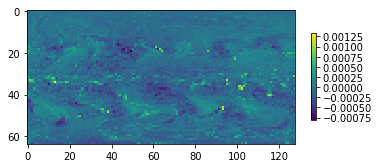

In [33]:
plt.imshow(diff[29]); plt.colorbar(shrink=0.4)

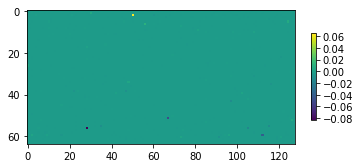

In [37]:
plt.imshow(reldiff[29]); plt.colorbar(shrink=0.4)

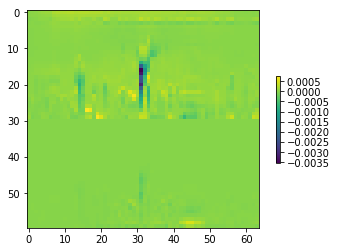

In [35]:
plt.imshow(diff[:, :, 0]); plt.colorbar(shrink=0.4)

## Engy Cons

In [5]:
DATA_DIR = '/scratch/05488/tg847872/debug/'

In [6]:
def get_cb_inps(ds, t, m, s):
    x = np.concatenate(
        [ds['NNTBP'][t], ds['NNQBP'][t], ds['NNQCBP'][t], ds['NNQIBP'][t], ds['NNVBP'][t],
         np.expand_dims(ds['NNPS'][t], 0),
         np.expand_dims(ds['NNSOLIN'][t], 0), np.expand_dims(ds['NNSHF'][t], 0), np.expand_dims(ds['NNLHF'][t], 0)]
    )
    return normalize(x, m, s)

In [26]:
def stack_outps(ds, t):
    x = np.concatenate(
        [ds['NNDT'].isel(time=t)*C_P, ds['NNDQ'].isel(time=t)*L_V, 
         ds['NNDQC'].isel(time=t)*L_V, ds['NNDQI'].isel(time=t)*L_V, 
         np.expand_dims(ds['NNPRECL'][t], 0)* (24*3600*2e-2), np.expand_dims(ds['NNPRECS'][t], 0)* (24*3600*2e-2),
         np.expand_dims(ds['NNFSNT'][t], 0)* (1e-3), np.expand_dims(ds['NNFSNS'][t], 0)* (-1e-3), 
         np.expand_dims(ds['NNFLNT'][t], 0)* (-1e-3), np.expand_dims(ds['NNFLNS'][t], 0)* (1e-3)])
    return x

In [8]:
ds = xr.open_mfdataset(f'{DATA_DIR}AndKua_aqua_SPCAM3.0_F001.cam2.h1.0000-01-01-00000.nc', decode_times=False)

In [9]:
ds

<xarray.Dataset>
Dimensions:       (crm_x: 32, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 48)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon           (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0 32.0 ...
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 912.6 887.0 859.5 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 90.01 90.02 90.04 ...
  * time          (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 ...
D

In [10]:
m = keras.models.load_model(f'{KERAS_DIR}/F001_fbp_engy_cons_sample1_max_rs_deep.h5')

In [11]:
mean = np.loadtxt(f'{KERAS_DIR}/F001_fbp_engy_cons_sample1_max_rs_deep/inp_means.txt', delimiter=',')
std = np.loadtxt(f'{KERAS_DIR}/F001_fbp_engy_cons_sample1_max_rs_deep/inp_max_rs.txt', delimiter=',')

In [12]:
mins = np.loadtxt(f'{KERAS_DIR}/F001_fbp_engy_cons_sample1_max_rs_deep/inp_mins.txt', delimiter=',')
maxs = np.loadtxt(f'{KERAS_DIR}/F001_fbp_engy_cons_sample1_max_rs_deep/inp_maxs.txt', delimiter=',')

In [32]:
inps = get_cb_inps(ds, 1, mean, std); inps.shape

(154, 64, 128)

In [33]:
inps[:, 0, 0]

array([ 2.40092898e-01,  1.66923517e-01,  1.69268137e-01,  2.87552204e-01,
        2.52248358e-01,  3.36698760e-01,  3.61610037e-01,  4.06526046e-01,
        4.43524880e-01,  4.21594253e-01,  3.46029662e-01,  2.68340981e-01,
        1.76103862e-01,  1.49122445e-02, -1.27778711e-01, -2.19031904e-01,
       -2.66984244e-01, -2.96700439e-01, -3.01665106e-01, -2.85523128e-01,
       -2.78544321e-01, -2.90104064e-01, -2.91888869e-01, -2.86762198e-01,
       -2.96889397e-01, -3.04520931e-01, -3.07023805e-01, -3.22790762e-01,
       -3.04410891e-01, -2.79926152e-01,  2.21884475e-04,  2.33396104e-04,
        3.08119766e-04,  2.59380657e-04,  2.72733067e-04,  2.42691430e-04,
        2.00877818e-04,  1.66538067e-04,  7.24311849e-05, -2.16498700e-04,
       -1.18301257e-03, -4.01779040e-03, -1.03893406e-02, -2.26456299e-02,
       -4.62930453e-02, -5.72942147e-02, -6.27448991e-02, -7.34285965e-02,
       -8.16800092e-02, -9.32715683e-02, -1.18096270e-01, -1.62046762e-01,
       -2.04760358e-01, -

In [34]:
outps = stack_outps(ds, 1); outps.shape

(126, 64, 128)

In [35]:
outps[:, 0, 0]

array([-4.32284456e-03, -3.60185397e-03,  1.36270956e-03, -2.47348961e-03,
       -2.32948526e-03, -3.48402420e-04,  5.48344069e-05, -1.06776781e-04,
       -2.87906878e-04, -4.89880622e-04, -2.65419309e-04, -1.59161136e-04,
        2.78717780e-04, -6.69115281e-04, -2.36431789e-03, -4.64689452e-03,
       -6.45356439e-03, -7.65208900e-03, -7.20349792e-03, -6.23498950e-03,
       -6.01701252e-03, -5.41830063e-03, -5.54270763e-03, -8.67948029e-03,
       -1.30679868e-02, -9.50999185e-03,  4.13129688e-04,  3.91302863e-03,
        2.07273383e-03, -6.04583789e-03, -8.52878277e-27,  1.56767780e-27,
        8.29840729e-08,  4.71791850e-08,  1.97594510e-08,  9.22444965e-09,
       -1.31248797e-07,  1.40853075e-07, -8.98789267e-07,  3.80824235e-06,
        1.82885415e-05,  5.13855084e-05,  4.51974083e-05, -6.16070320e-05,
       -1.00728692e-04,  9.58874898e-06,  4.89320955e-04,  8.30771110e-04,
       -1.91278505e-05, -6.52616320e-04, -1.04696897e-04, -4.96458786e-04,
        1.68167776e-03,  

In [36]:
preds = m.predict(inps.reshape(154, -1).T, 4096).T.reshape(126, 64, 128); preds.shape

(126, 64, 128)

In [37]:
preds[:, 0, 0]

array([-4.34289826e-03, -3.61854304e-03,  1.36900507e-03, -2.48495303e-03,
       -2.34029582e-03, -3.50023620e-04,  5.50843542e-05, -1.07267755e-04,
       -2.89229210e-04, -4.92161140e-04, -2.66671181e-04, -1.59893534e-04,
        2.79998407e-04, -6.72239345e-04, -2.37530842e-03, -4.66843555e-03,
       -6.48350548e-03, -7.68760126e-03, -7.23694917e-03, -6.26393640e-03,
       -6.04493171e-03, -5.44347614e-03, -5.56837860e-03, -8.71935301e-03,
       -1.31286448e-02, -9.55499895e-03,  4.14457172e-04,  3.93086392e-03,
        2.08248571e-03, -6.07270002e-03, -8.52267758e-27,  1.56674170e-27,
        8.29530791e-08,  4.71634394e-08,  1.97508268e-08,  9.22122467e-09,
       -1.31197282e-07,  1.40802115e-07, -8.98417966e-07,  3.80683923e-06,
        1.82818039e-05,  5.13682608e-05,  4.51880042e-05, -6.15650788e-05,
       -1.00673176e-04,  9.59029421e-06,  4.89121303e-04,  8.30442645e-04,
       -1.91042200e-05, -6.52397168e-04, -1.04738632e-04, -4.96184453e-04,
        1.68095157e-03,  

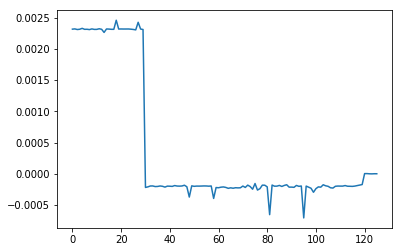

In [50]:
plt.plot((preds[:, 51, 46] - outps[:, 51, 46])/(preds[:, 51, 46] + outps[:, 51, 46]))

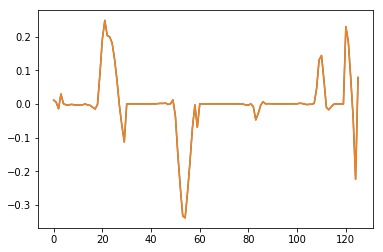

In [52]:
plt.plot(preds[:, 51, 46]); plt.plot(outps[:, 51, 46]); 

In [40]:
np.argmin((preds[:, 0, 0] - outps[:, 0, 0])/(preds[:, 0, 0] + outps[:, 0, 0]))

116

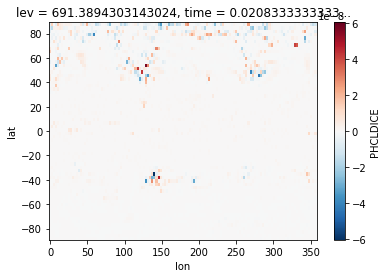

In [53]:
ds['PHCLDICE'].isel(time=1, lev=20).plot();

In [47]:
get2Didxs(ds['NNDQI'].isel(time=1, lev=20), np.argmax)

(51, 46)

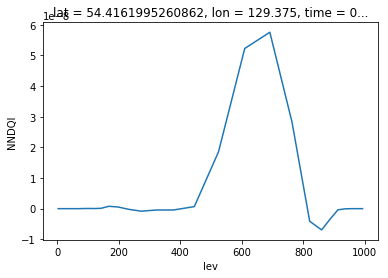

In [49]:
ds['NNDQI'].isel(time=1, lat=51, lon=46).plot();

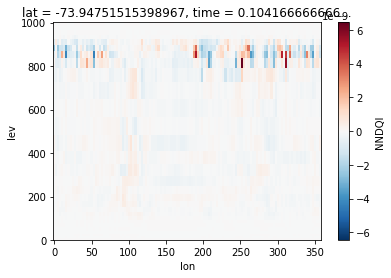

In [34]:
ds['NNDQI'].isel(time=-1, lat=5).plot();

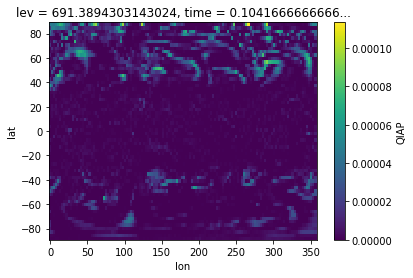

In [32]:
ds['QIAP'].isel(time=-1, lev=20).plot()

In [37]:
maxs

array([2.527651e+02, 2.480191e+02, 2.429534e+02, 2.445681e+02,
       2.421432e+02, 2.379490e+02, 2.353343e+02, 2.318485e+02,
       2.307125e+02, 2.301419e+02, 2.291311e+02, 2.294602e+02,
       2.294405e+02, 2.370479e+02, 2.464018e+02, 2.552583e+02,
       2.628457e+02, 2.698922e+02, 2.771661e+02, 2.838207e+02,
       2.906270e+02, 2.942346e+02, 2.951005e+02, 2.972535e+02,
       2.986203e+02, 2.992483e+02, 3.001145e+02, 2.996307e+02,
       3.010131e+02, 3.023457e+02, 1.903576e-06, 1.892809e-06,
       1.778147e-06, 2.020600e-06, 1.778398e-06, 9.133834e-06,
       7.085284e-06, 3.907367e-06, 6.031885e-06, 1.146162e-05,
       3.181707e-05, 1.029822e-04, 2.951710e-04, 6.991781e-04,
       1.418804e-03, 2.596727e-03, 4.257601e-03, 6.238290e-03,
       8.384435e-03, 1.075245e-02, 1.307466e-02, 1.526535e-02,
       1.695239e-02, 1.819741e-02, 1.905159e-02, 1.982549e-02,
       2.049326e-02, 2.126998e-02, 2.200395e-02, 2.358391e-02,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.0000

In [40]:
get_cb_inps(ds, 3, mean, std)[:, 0, 0]

array([ 2.40095385e-01,  1.66801674e-01,  1.69304925e-01,  2.87354801e-01,
        2.51974696e-01,  3.36597907e-01,  3.61365291e-01,  4.06047714e-01,
        4.42927329e-01,  4.20931220e-01,  3.45651462e-01,  2.68197935e-01,
        1.75932519e-01,  1.40095280e-02, -1.27833680e-01, -2.19125020e-01,
       -2.66770214e-01, -2.96052392e-01, -3.01299549e-01, -2.85242832e-01,
       -2.77871969e-01, -2.89444221e-01, -2.90887742e-01, -2.86460175e-01,
       -2.96115204e-01, -3.03894881e-01, -3.06908257e-01, -3.23324762e-01,
       -3.04642263e-01, -2.80190923e-01,  2.21881473e-04,  2.33381228e-04,
        3.08044587e-04,  2.59347103e-04,  2.72916913e-04,  2.42931510e-04,
        2.00775556e-04,  1.66681622e-04,  7.16175542e-05, -2.13792245e-04,
       -1.17121149e-03, -3.98576202e-03, -1.03710057e-02, -2.27347097e-02,
       -4.64143518e-02, -5.71168376e-02, -6.24725954e-02, -7.28862560e-02,
       -8.17972087e-02, -9.36260189e-02, -1.18623167e-01, -1.62516574e-01,
       -2.05311241e-01, -